# Group Fake News Project

## Part 1: Data Processing


### Task 1.1

In [103]:
import pandas as pd

# 1. Read the CSV file
data = pd.read_csv('news_sample.csv')

In [104]:
import re
from cleantext import clean

def preprocess_text(text):
    cleaned_text = clean(text,
                         fix_unicode=True,
                         to_ascii=True,
                         lower=True,
                         no_line_breaks=True,
                         no_urls=True,
                         no_emails=True,
                         no_phone_numbers=True,
                         no_numbers=True,
                         no_digits=True,
                         no_currency_symbols=True,
                         no_punct=False,  
                         replace_with_url="<URL>",
                         replace_with_email="<EMAIL>",
                         replace_with_phone_number="<PHONE>",
                         replace_with_number="<NUM>",
                         replace_with_digit="<NUM>",
                         replace_with_currency_symbol="<CUR>",
                         lang="en")
    return cleaned_text

In [105]:
import pandas as pd
import re

# Tokenize text into words
def tokenize(text):
    words = re.findall(r'\b\w+\b', text)
    return words

# Preprocessing to the text column
data['cleaned_text'] = data['content'].apply(preprocess_text)

# Cleaned text into one string
cleaned_text = ' '.join(data['cleaned_text'])


In [106]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist

# Tokenize the text
tokens = word_tokenize(cleaned_text)

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

# Compute vocabulary size before removing stopwords
vocab_before = set(tokens)
vocab_size_before = len(vocab_before)

# Compute vocabulary size after removing stopwords
vocab_after = set(filtered_tokens)
vocab_size_after = len(vocab_after)

# Compute reduction rate of vocabulary size after removing stopwords
reduction_rate_stopwords = (vocab_size_before - vocab_size_after) / vocab_size_before

# Stemming
porter = PorterStemmer()
stemmed_tokens = [porter.stem(word) for word in filtered_tokens]

# Compute vocabulary size before stemming
vocab_size_before_stemming = len(vocab_after)

# Compute vocabulary size after stemming
vocab_after_stemming = set(stemmed_tokens)
vocab_size_after_stemming = len(vocab_after_stemming)

# Compute reduction rate of vocabulary size after stemming
reduction_rate_stemming = (vocab_size_before_stemming - vocab_size_after_stemming) / vocab_size_before_stemming

# Display results
print("Size of vocabulary before removing stopwords:", vocab_size_before)
print("Size of vocabulary after removing stopwords:", vocab_size_after)
print("Reduction rate of vocabulary size after removing stopwords: {:.2f}%".format(reduction_rate_stopwords * 100))

print("\nSize of vocabulary before stemming:", vocab_size_before_stemming)
print("Size of vocabulary after stemming:", vocab_size_after_stemming)
print("Reduction rate of vocabulary size after stemming: {:.2f}%".format(reduction_rate_stemming * 100))

Size of vocabulary before removing stopwords: 16475
Size of vocabulary after removing stopwords: 16343
Reduction rate of vocabulary size after removing stopwords: 0.80%

Size of vocabulary before stemming: 16343
Size of vocabulary after stemming: 11168
Reduction rate of vocabulary size after stemming: 31.66%


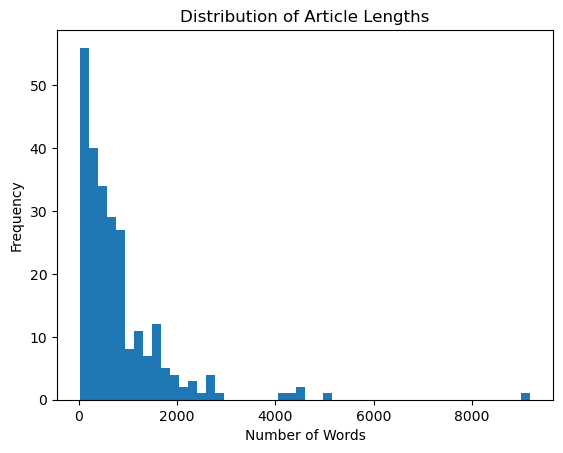

KeyError: 'published_at'